In [13]:
import sys, os, os.path
import glob
import math

In [14]:
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [15]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
data_root = "/home/malvarado/FHDeX/exec/immersed_boundary"
data_dir  = "channel_soft"

In [18]:
data_path = os.path.join(data_root, data_dir)

In [19]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [20]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()

In [21]:
data_files

['/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000000',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000000.old.98571252823',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000001',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000001.old.34662628174',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000002',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000002.old.96132111549',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000003',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000003.old.66937303543']

### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="concentration"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

def plot_frame(index, data_files, n_fill):
    prefix   = "frame_"
    file_fmt = prefix + "{:0" + str(n_fill) + "d}.png"
    
    # legacy
    substitute_header(data_files[index])
    
    ds = yt.load(data_files[index])
    
    slc = yt.SlicePlot(ds, "x", "concentration")
    slc.set_log("concentration", False)
    slc.set_zlim("concentration", 1e-100, 1e-5)
    
    #slc.show()
    slc.save(file_fmt.format(index))

# for i in range(0, len(data_files)):
    plot_frame(i, data_files, 4)

In [10]:
# to stitch together the movie:
#    ffmpeg -pattern_type glob -i "frame_*.png" movie.mpeg

num_frames = 200
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i])    
    slc = yt.SlicePlot(ds, "z", "C")
    slc.zoom(2)
    slc.set_log("C", False)
    slc.set_zlim("C", 1e-100, 7e-4)
    slc.annotate_quiver('averaged_velx', 'averaged_vely',scale=0.3)
    #slc.show()
    slc.save('velocityquiver_%.4d.png' % i)

yt : [INFO     ] 2019-07-26 10:27:38,169 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-26 10:27:38,170 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-26 10:27:38,171 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-26 10:27:38,171 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-26 10:27:38,346 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:27:38,347 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:27:38,348 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:27:38,348 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:27:38,350 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/site

IndexError: list index out of range

In [10]:


#yt.define_unit("millimeter", (1.0, "cm"))


ds = yt.load(data_files[-1])


yt : [INFO     ] 2019-07-26 12:09:24,207 Parameters: current_time              = 0.003
yt : [INFO     ] 2019-07-26 12:09:24,208 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-26 12:09:24,208 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-26 12:09:24,209 Parameters: domain_right_edge         = [1. 1. 1.]


In [11]:
ds.field_list

[('boxlib', 'C'),
 ('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'dCdx'),
 ('boxlib', 'dCdx_cen'),
 ('boxlib', 'dCdy'),
 ('boxlib', 'dCdy_cen'),
 ('boxlib', 'dCdz'),
 ('boxlib', 'dCdz_cen'),
 ('boxlib', 'divergence'),
 ('boxlib', 'force_ibm_x'),
 ('boxlib', 'force_ibm_y'),
 ('boxlib', 'force_ibm_z'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_force_ibm_x'),
 ('boxlib', 'shifted_force_ibm_y'),
 ('boxlib', 'shifted_force_ibm_z'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer'),
 ('boxlib', '|Dc|')]

yt : [INFO     ] 2019-07-26 12:13:04,165 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 12:13:04,166 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 12:13:04,167 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 12:13:04,167 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 12:13:04,168 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin), value)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/sit


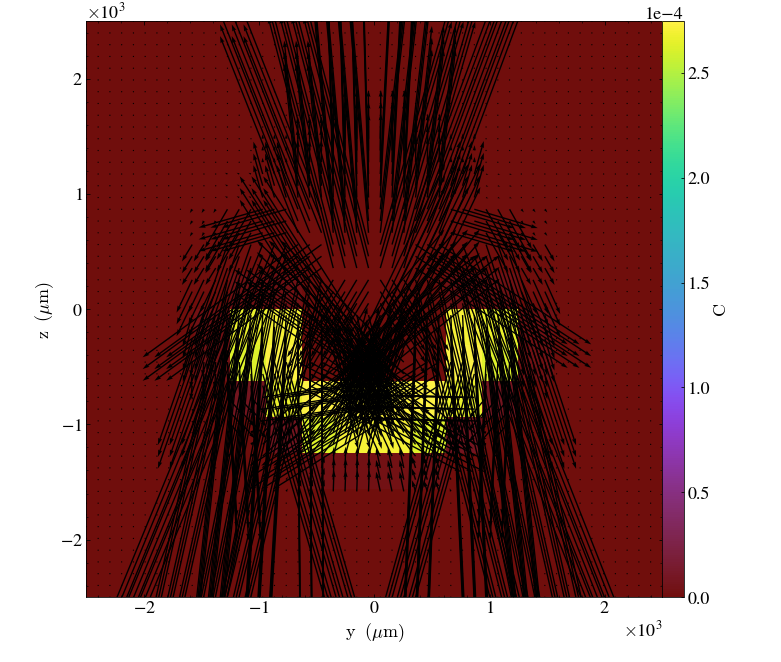

In [23]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('force_ibm_y', 'force_ibm_z',scale=1)
slc.zoom(2)
slc.show()

yt : [INFO     ] 2019-07-26 10:36:41,706 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:36:41,707 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:36:41,709 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:36:41,709 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:36:41,711 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin), value)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/sit


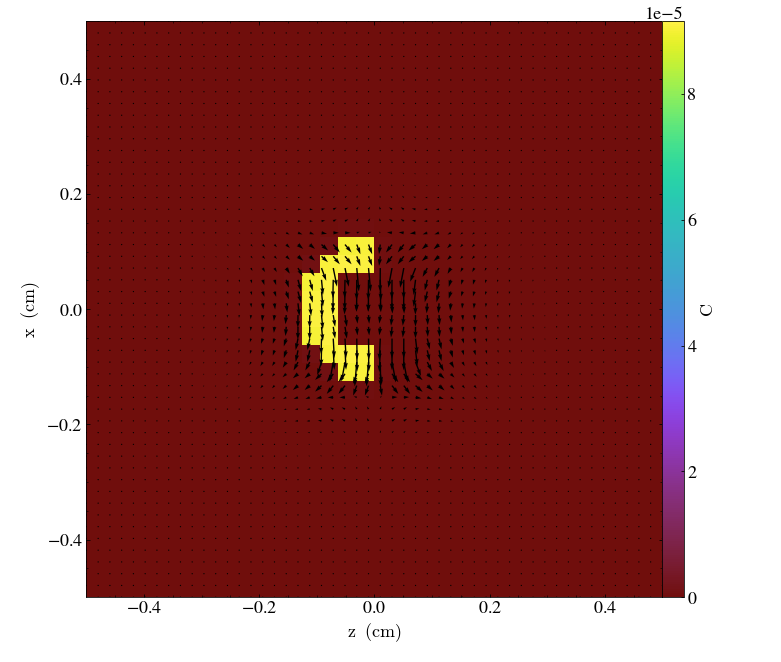

In [37]:
slc = yt.SlicePlot(ds, "y", "C")
slc.set_log("C", False)
#width=(10.,"mm")
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('averaged_velx', 'averaged_velz',scale=0.002)
#slc.zoom(2)
slc.show()
#slc.save("step_0.png")

yt : [INFO     ] 2019-07-26 10:39:03,641 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:39:03,641 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:39:03,642 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:39:03,643 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-26 10:39:03,644 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



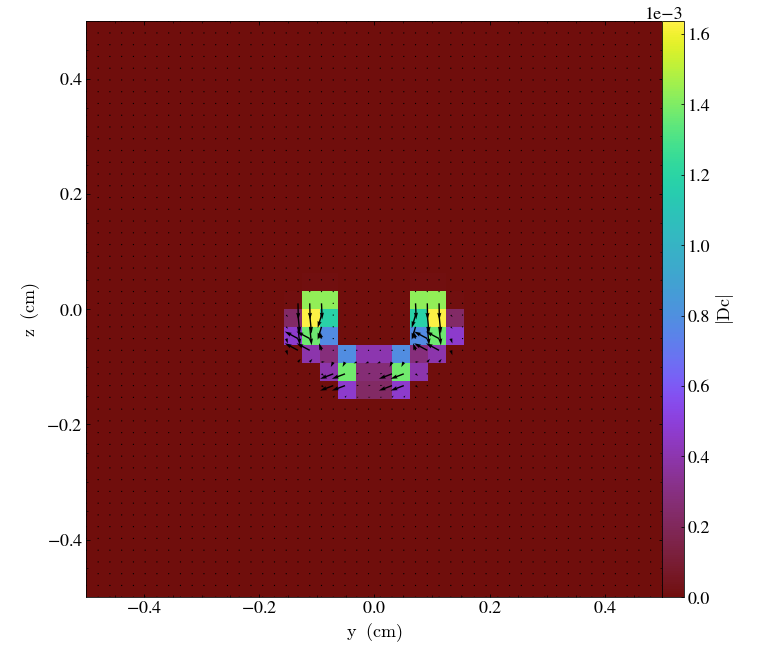

In [39]:
 slc = yt.SlicePlot(ds, "x", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
#slc.annotate_quiver('slipvel_x', 'slipvel_y',scale=1)
slc.annotate_quiver('dCdx_cen', 'dCdz_cen',scale=0.05)
slc.show()

In [61]:
num_frames = 200
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i]) 

    slc = yt.SlicePlot(ds, "z", "|Dc|")
    slc.set_log("|Dc|", False)
    slc.set_zlim("|Dc|", 1e-100, 8e-3)
    slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=0.15)
    slc.zoom(2)
    #slc.show()
    slc.save('gradientquiver_%.4d.png' % i)

yt : [INFO     ] 2019-07-18 16:51:21,956 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-18 16:51:21,956 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:21,957 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:21,957 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:22,116 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:22,117 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:22,118 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:22,118 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:22,120 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [WARNING  ] 2019-07-18 16:51:22,145 Plot image for field ('boxlib', '|Dc|') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2019-07-18 16:51:22,146 Switching to linear colorbar scaling.
yt : [INFO     ] 2019-07-18 16:51:22,239 Making a fixed reso

yt : [INFO     ] 2019-07-18 16:51:27,745 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:27,746 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:27,857 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:27,980 Saving plot gradientquiver_0008.png
yt : [INFO     ] 2019-07-18 16:51:28,220 Parameters: current_time              = 0.0009000000000000002
yt : [INFO     ] 2019-07-18 16:51:28,221 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:28,221 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:28,222 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:28,379 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:28,379 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:28,380 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:28,381 ylim = 0.000000 1.000

yt : [INFO     ] 2019-07-18 16:51:33,857 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:33,858 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:33,859 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:33,859 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:33,861 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:33,970 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:34,091 Saving plot gradientquiver_0017.png
yt : [INFO     ] 2019-07-18 16:51:34,392 Parameters: current_time              = 0.0018000000000000006
yt : [INFO     ] 2019-07-18 16:51:34,393 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:34,393 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:34,394 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:34,548 xlim = 0.000000 1.000

yt : [INFO     ] 2019-07-18 16:51:39,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:39,645 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:39,801 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:39,801 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:39,802 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:39,803 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:39,804 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:39,913 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:40,035 Saving plot gradientquiver_0026.png
yt : [INFO     ] 2019-07-18 16:51:40,268 Parameters: current_time              = 0.0026999999999999993
yt : [INFO     ] 2019-07-18 16:51:40,269 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:40,270 Parameters: domain_le

yt : [INFO     ] 2019-07-18 16:51:45,944 Parameters: current_time              = 0.003499999999999998
yt : [INFO     ] 2019-07-18 16:51:45,945 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:45,945 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:45,946 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:46,101 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:46,102 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:46,103 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:46,104 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:46,105 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:46,213 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:46,334 Saving plot gradientquiver_0035.png
yt : [INFO     ] 2019-07-18 16:51:46,635 Parameters: current_ti

yt : [INFO     ] 2019-07-18 16:51:51,701 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:51,879 Saving plot gradientquiver_0043.png
yt : [INFO     ] 2019-07-18 16:51:52,161 Parameters: current_time              = 0.0043999999999999985
yt : [INFO     ] 2019-07-18 16:51:52,161 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:52,162 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:52,163 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:52,388 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:52,389 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:52,389 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:52,390 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:52,391 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:52,545 Making a fixed resolu

yt : [INFO     ] 2019-07-18 16:51:57,678 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:57,679 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:57,856 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:51:57,976 Saving plot gradientquiver_0052.png
yt : [INFO     ] 2019-07-18 16:51:58,206 Parameters: current_time              = 0.005300000000000001
yt : [INFO     ] 2019-07-18 16:51:58,207 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:51:58,207 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:51:58,208 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:51:58,363 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:58,363 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:58,364 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:51:58,365 ylim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:52:03,975 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:03,976 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:03,977 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:03,977 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:03,979 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:04,092 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:04,217 Saving plot gradientquiver_0061.png
yt : [INFO     ] 2019-07-18 16:52:04,446 Parameters: current_time              = 0.006200000000000003
yt : [INFO     ] 2019-07-18 16:52:04,447 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:04,447 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:04,448 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:04,605 xlim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:52:09,715 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:09,715 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:09,872 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:09,873 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:09,874 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:09,874 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:09,875 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:09,982 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:10,103 Saving plot gradientquiver_0070.png
yt : [INFO     ] 2019-07-18 16:52:10,401 Parameters: current_time              = 0.007100000000000006
yt : [INFO     ] 2019-07-18 16:52:10,402 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:10,402 Parameters: domain_lef

yt : [INFO     ] 2019-07-18 16:52:15,730 Parameters: current_time              = 0.007900000000000008
yt : [INFO     ] 2019-07-18 16:52:15,731 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:15,732 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:15,733 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:15,959 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:15,959 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:15,961 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:15,961 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:15,963 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:16,073 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:16,195 Saving plot gradientquiver_0079.png
yt : [INFO     ] 2019-07-18 16:52:16,424 Parameters: current_ti

yt : [INFO     ] 2019-07-18 16:52:21,492 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:21,615 Saving plot gradientquiver_0087.png
yt : [INFO     ] 2019-07-18 16:52:21,846 Parameters: current_time              = 0.008800000000000002
yt : [INFO     ] 2019-07-18 16:52:21,846 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:21,847 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:21,848 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:22,002 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:22,002 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:22,003 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:22,004 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:22,005 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:22,113 Making a fixed resolut

yt : [INFO     ] 2019-07-18 16:52:27,496 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:27,498 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:27,627 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:27,784 Saving plot gradientquiver_0096.png
yt : [INFO     ] 2019-07-18 16:52:28,016 Parameters: current_time              = 0.009699999999999997
yt : [INFO     ] 2019-07-18 16:52:28,016 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:28,017 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:28,018 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:28,171 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:28,171 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:28,172 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:28,173 ylim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:52:34,013 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:34,014 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:34,015 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:34,015 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:34,016 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:34,128 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:34,374 Saving plot gradientquiver_0105.png
yt : [INFO     ] 2019-07-18 16:52:34,654 Parameters: current_time              = 0.010599999999999991
yt : [INFO     ] 2019-07-18 16:52:34,655 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:34,655 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:34,656 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:34,817 xlim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:52:40,693 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:40,694 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:40,857 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:40,858 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:40,859 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:40,860 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:40,861 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:40,971 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:41,095 Saving plot gradientquiver_0114.png
yt : [INFO     ] 2019-07-18 16:52:41,329 Parameters: current_time              = 0.011499999999999986
yt : [INFO     ] 2019-07-18 16:52:41,329 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:41,330 Parameters: domain_lef

yt : [INFO     ] 2019-07-18 16:52:46,837 Parameters: current_time              = 0.012299999999999981
yt : [INFO     ] 2019-07-18 16:52:46,838 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:46,838 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:46,839 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:46,991 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:46,992 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:46,993 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:46,993 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:46,994 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:47,107 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:47,237 Saving plot gradientquiver_0123.png
yt : [INFO     ] 2019-07-18 16:52:47,467 Parameters: current_ti

yt : [INFO     ] 2019-07-18 16:52:52,508 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:52,633 Saving plot gradientquiver_0131.png
yt : [INFO     ] 2019-07-18 16:52:52,868 Parameters: current_time              = 0.013199999999999976
yt : [INFO     ] 2019-07-18 16:52:52,869 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:52,869 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:52,870 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:53,028 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:53,029 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:53,030 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:53,030 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:53,032 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:53,144 Making a fixed resolut

yt : [INFO     ] 2019-07-18 16:52:59,070 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:59,073 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:59,187 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:52:59,308 Saving plot gradientquiver_0140.png
yt : [INFO     ] 2019-07-18 16:52:59,606 Parameters: current_time              = 0.01409999999999997
yt : [INFO     ] 2019-07-18 16:52:59,607 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:52:59,607 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:52:59,608 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:52:59,766 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:59,767 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:59,768 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:52:59,768 ylim = 0.000000 1.00000

yt : [INFO     ] 2019-07-18 16:53:05,178 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:05,178 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:05,179 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:05,180 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:05,182 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:05,302 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:05,450 Saving plot gradientquiver_0149.png
yt : [INFO     ] 2019-07-18 16:53:05,751 Parameters: current_time              = 0.014999999999999965
yt : [INFO     ] 2019-07-18 16:53:05,752 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:05,753 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:05,754 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:05,945 xlim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:53:12,098 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:12,099 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:12,307 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:12,307 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:12,308 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:12,309 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:12,310 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:12,419 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:12,596 Saving plot gradientquiver_0158.png
yt : [INFO     ] 2019-07-18 16:53:12,910 Parameters: current_time              = 0.01589999999999996
yt : [INFO     ] 2019-07-18 16:53:12,911 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:12,912 Parameters: domain_left

yt : [INFO     ] 2019-07-18 16:53:18,567 Parameters: current_time              = 0.016699999999999954
yt : [INFO     ] 2019-07-18 16:53:18,568 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:18,568 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:18,569 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:18,724 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:18,724 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:18,725 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:18,725 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:18,727 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:18,924 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:19,044 Saving plot gradientquiver_0167.png
yt : [INFO     ] 2019-07-18 16:53:19,274 Parameters: current_ti

yt : [INFO     ] 2019-07-18 16:53:24,531 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:24,709 Saving plot gradientquiver_0175.png
yt : [INFO     ] 2019-07-18 16:53:25,071 Parameters: current_time              = 0.01759999999999995
yt : [INFO     ] 2019-07-18 16:53:25,072 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:25,073 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:25,073 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:25,231 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:25,231 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:25,233 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:25,233 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:25,235 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:25,377 Making a fixed resoluti

yt : [INFO     ] 2019-07-18 16:53:31,489 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:31,490 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:31,644 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:31,792 Saving plot gradientquiver_0184.png
yt : [INFO     ] 2019-07-18 16:53:32,041 Parameters: current_time              = 0.018499999999999944
yt : [INFO     ] 2019-07-18 16:53:32,041 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:32,042 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:32,043 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:32,205 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:32,205 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:32,207 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:32,207 ylim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 16:53:37,858 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:37,859 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:37,860 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:37,860 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 16:53:37,861 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:37,978 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-18 16:53:38,103 Saving plot gradientquiver_0193.png
yt : [INFO     ] 2019-07-18 16:53:38,422 Parameters: current_time              = 0.019399999999999938
yt : [INFO     ] 2019-07-18 16:53:38,423 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-18 16:53:38,423 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-18 16:53:38,424 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-18 16:53:38,587 xlim = 0.000000 1.0000

yt : [INFO     ] 2019-07-18 14:37:18,179 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-18 14:37:18,182 Creating volume
/home/malvarado/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/malvarado/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1373: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2019-07-18 14:37:18,374 Creating transfer function
yt : [INFO     ] 2019-07-18 14:37:18,375 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2019-07-18 14:37:21,717 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-18 14:37:25,063 Saving render plt0000178_Render_C.png


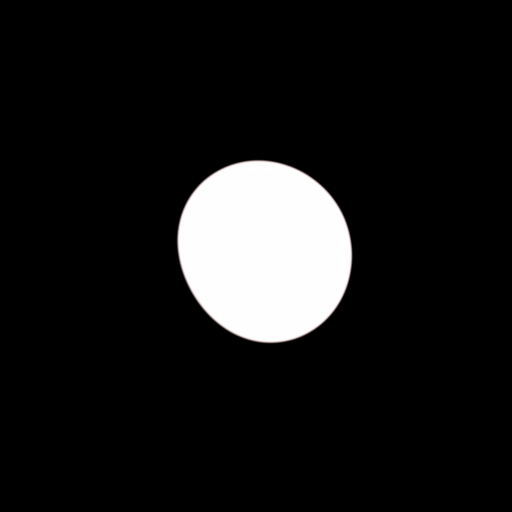

In [90]:
#sc = yt.create_scene(ds, 'C')
im, sc = yt.volume_render(ds, 'C')
sc.show()

yt : [INFO     ] 2019-07-18 14:37:25,683 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 14:37:25,684 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 14:37:25,686 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 14:37:25,687 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-18 14:37:25,700 Making a fixed resolution buffer of (('boxlib', 'dCdz_cen')) 800 by 800
yt : [WARNING  ] 2019-07-18 14:37:25,747 Plot image for field ('boxlib', 'dCdz_cen') has both positive and negative values. Min = -0.000900, Max = 0.000900.
yt : [WARNING  ] 2019-07-18 14:37:25,748 Switching to symlog colorbar scaling unless linear scaling is specified later



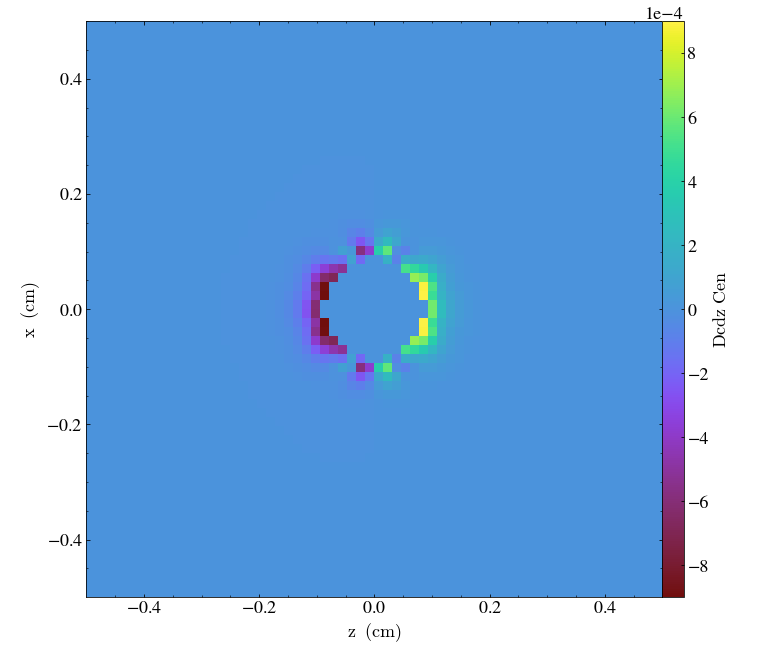

In [91]:
slc = yt.SlicePlot(ds, "y", "dCdz_cen")
slc.set_log("dCdz_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

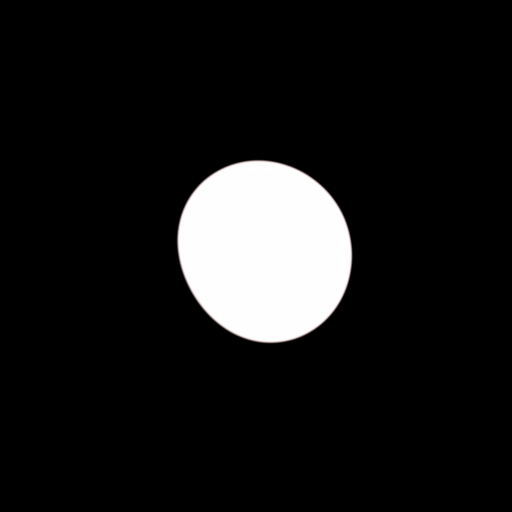

In [92]:
sc.camera.width = (300, 'kpc')
sc.show()



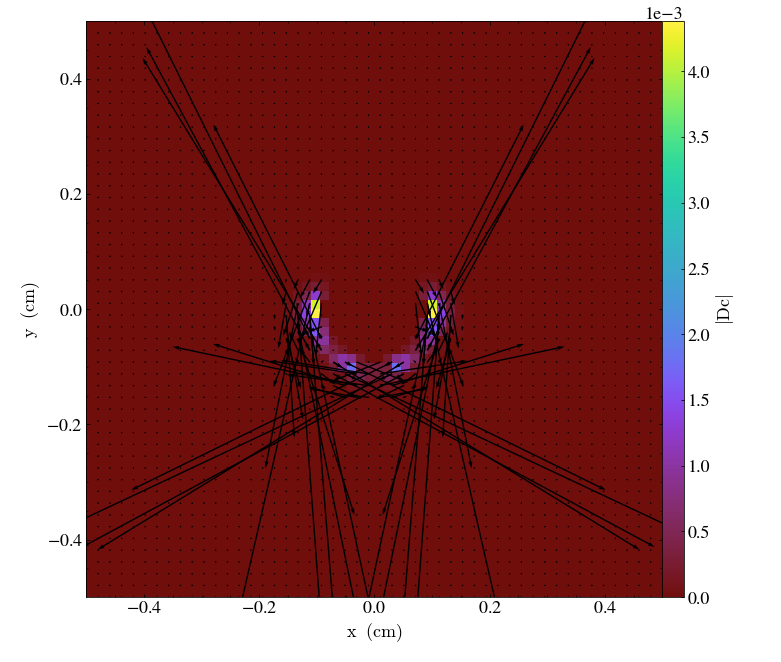

In [160]:
slc.annotate_quiver('dCdx_cen', 'dCdy_cen')

yt : [INFO     ] 2019-07-17 10:53:32,733 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,736 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,748 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



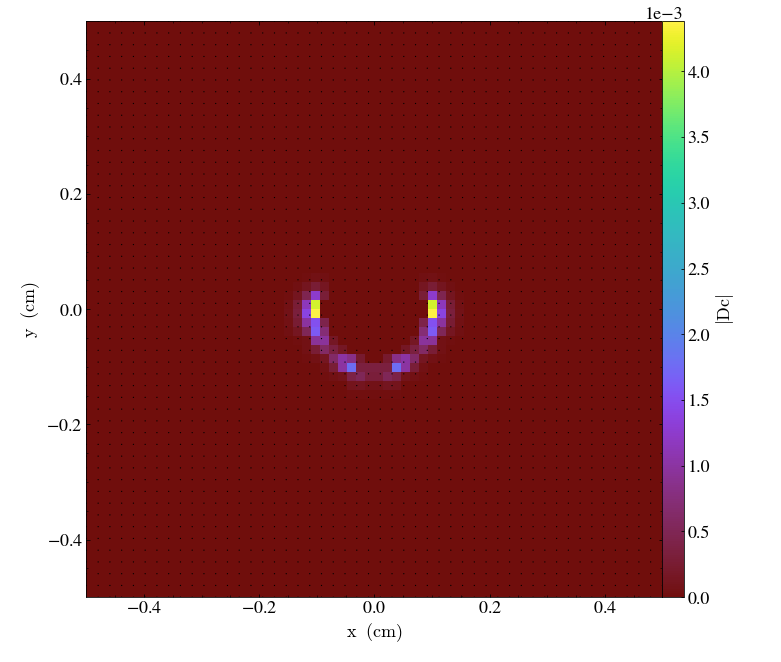

In [161]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=100000)
slc.show()

(x,  y,  z) C
-----------------------


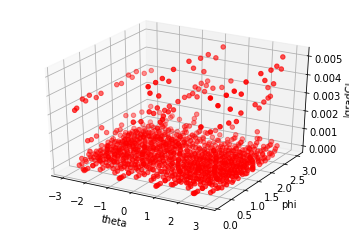

In [162]:
sp= ds.sphere("c", (.1, "cm"))
p=sp["C"]
import array

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

#phi1= np.zeros(len(C), dtype = float)#np.array('d');
#theta1= np.zeros(len(C), dtype = float)
#C1= np.zeros(len(C), dtype = float)
#Cdx1= np.zeros(len(C), dtype = float)
#Cdy1= np.zeros(len(C), dtype = float)
#Cdz1= np.zeros(len(C), dtype = float)
phi1=array.array('d');
theta1=array.array('d');
C1=array.array('d');
Cdx1=array.array('d');
Cdy1=array.array('d');
Cdz1=array.array('d');
gradCmag1=array.array('d');
from yt.units import cm
cen=0.5*cm
#print(p)
#plot(p)
#plot = yt.ProfilePlot(p, "radius", "C")

#plot = yt.ProfilePlot(sp,"Psi", "C")

print("(x,  y,  z) C")

print("-----------------------")
for count in range(sp["C"].size):
   j=count
   k=count
   i=count
   phi=(math.acos((sp["z"][k]-cen)/math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2)))
   theta=(math.atan2((sp["y"][j]-cen),(sp["x"][i]-cen)))
   gradCmag=math.sqrt((sp["dCdx"][j])**2+(sp["dCdy"][k])**2+(sp["dCdz"][i])**2)
   phi1.append(phi)
   theta1.append(theta)
   #print( theta, sp["y"][j]-cen, sp["x"][i]-cen, (sp["y"][j]-cen)/(sp["x"][i]-cen) )
  # print( math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2))
   C1.append(sp["C"][count])
   Cdx1.append(sp["dCdx"][count])
   Cdy1.append(sp["dCdy"][count])
   Cdz1.append(sp["dCdz"][count])
   gradCmag1.append(gradCmag)
  # print("(%f,  %f,  %f)    %f", (phi1, theta1, sp["C"][i]))
    
    #phi1=math.acos((sp["x"][i])/sp["z"][i])
#plot.set_unit('radius', 'cm')
#p.show()
#vec1=numpy.argsort(phi1)
#print(vec1)
#C2 = np.zeros(len(vec1), dtype = float) 
#for i in range(0, len(vec1)): 
#    C2[i]= C1[vec1[i]] 
    #print('Sorted array->', C1[vec1[i]]) 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.

# Plot the surface.
#surf = ax.plot_surface(phi1, theta1, Cdx1, linewidth=0, antialiased=False)#, cmap=cm.coolwarm,
                      # )
ax.scatter(theta1, phi1, gradCmag1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('|gradC|')
plt.show()

#plt.scatter(phi1, Cdy1)
#axes = plt.gca()
#axes.set_xlim([0, 3.14])
#axes.set_ylim([-0.003,0.003])

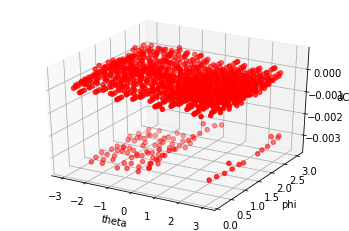

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdx')
plt.show()

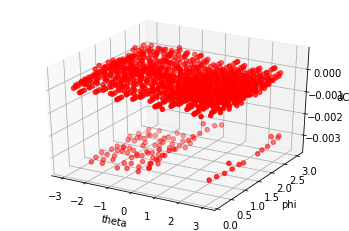

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdy')
plt.show()

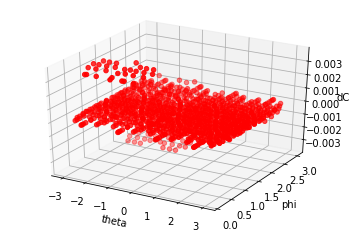

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdz1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdz')
plt.show()